In [1]:
from astropy.io import fits
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ckdtree as kdtree 
#plt.style.use('apw-notebook')
%matplotlib inline

In [2]:
tgas = fits.getdata("stacked_tgas.fits", 1)
matchTgasApass = fits.getdata('tgas-matched-apass-dr9.fits')

In [ ]:
#tgas.dtype.names

In [ ]:
#matchTgasApass.dtype.names

In [ ]:
#matchTgasApass[0]

In [ ]:
nfiles = 16
ndist = 10
dist = None #np.zeros(len(tgasMatched), ndist)
for j in range(1,nfiles+1):
    with h5py.File("distance-samples-{:02d}.hdf5".format(j)) as f:
        if dist is None:
            dist = f['distance'][:,:ndist]
        else:
            dist = np.concatenate((dist, f['distance'][:,:ndist]))

In [112]:
medianDist = np.median(dist, axis=1)

In [150]:
sigMax = 0.05
matched = matchTgasApass['matched'] & ~np.isnan(matchTgasApass['bmag']) & ~np.isnan(matchTgasApass['vmag']) & \
    ~np.isnan(matchTgasApass['gmag']) & ~np.isnan(matchTgasApass['rmag']) & ~np.isnan(matchTgasApass['imag']) & \
    (matchTgasApass['e_bmag'] != 0) & (matchTgasApass['e_vmag'] != 0) & (matchTgasApass['e_gmag'] != 0) & \
    (matchTgasApass['e_rmag'] != 0) & (matchTgasApass['e_imag'] != 0) & (medianDist < 1000.) & \
    (matchTgasApass['e_bmag'] < sigMax) & (matchTgasApass['e_vmag'] < sigMax) & (matchTgasApass['e_gmag'] < sigMax) & \
    (matchTgasApass['e_rmag'] < sigMax) & (matchTgasApass['e_imag'] < sigMax)
tgasMatched = tgas[matched]
magsMatched = matchTgasApass[matched]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


In [151]:
mags = ['bmag', 'vmag', 'gmag', 'rmag', 'imag']
errors = ['e_bmag', 'e_vmag', 'e_gmag', 'e_rmag', 'e_imag']
wavelength = [420., 520., 600., 658., 806.]

In [152]:
"""
matchedNan = matchTgasApass['matched'] & ~np.isnan(matchTgasApass['bmag']) & ~np.isnan(matchTgasApass['vmag']) & \
    ~np.isnan(matchTgasApass['gmag']) & ~np.isnan(matchTgasApass['rmag']) & ~np.isnan(matchTgasApass['imag'])

testErrZero = matchTgasApass[matchedNan]
print tgas[matchedNan]['tycho2_id'][matchTgasApass[matchedNan]['e_bmag'] == 0][0:100]
print testErrZero['bmag'][testErrZero['e_bmag']==0]
NzeroError = np.sum(np.logical_or.reduce(((testErrZero['e_bmag'] == 0), (testErrZero['e_vmag'] == 0),
                                          (testErrZero['e_gmag'] == 0), (testErrZero['e_rmag'] == 0),
                                          (testErrZero['e_imag'] == 0))))
print NzeroError, NzeroError/float(np.sum(matchedNan))
"""

"\nmatchedNan = matchTgasApass['matched'] & ~np.isnan(matchTgasApass['bmag']) & ~np.isnan(matchTgasApass['vmag']) &     ~np.isnan(matchTgasApass['gmag']) & ~np.isnan(matchTgasApass['rmag']) & ~np.isnan(matchTgasApass['imag'])\n\ntestErrZero = matchTgasApass[matchedNan]\nprint tgas[matchedNan]['tycho2_id'][matchTgasApass[matchedNan]['e_bmag'] == 0][0:100]\nprint testErrZero['bmag'][testErrZero['e_bmag']==0]\nNzeroError = np.sum(np.logical_or.reduce(((testErrZero['e_bmag'] == 0), (testErrZero['e_vmag'] == 0),\n                                          (testErrZero['e_gmag'] == 0), (testErrZero['e_rmag'] == 0),\n                                          (testErrZero['e_imag'] == 0))))\nprint NzeroError, NzeroError/float(np.sum(matchedNan))\n"

In [153]:
print len(matchTgasApass)
print len(tgas)
print np.sum(matched)
print len(matchTgasApass) - np.sum(matched)
print 'Percent unmatched = ', (len(tgas) - np.sum(matched))/np.float(len(tgas))*100., '%'

2057050
2057050
142611
1914439
Percent unmatched =  93.0672078948 %


In [154]:
#distanceShit = (matchTgasApass['ra'][matched] - tgas['ra'][matched])**2. + \
#(matchTgasApass['dec'][matched] - tgas['dec'][matched])**2.
#plt.plot(matchTgasApass['ra'][matched], distanceShit, 'ko')

In [155]:
medianDistMatched = np.median(distMatched, axis=1)
meanDistMatched = np.mean(distMatched, axis=1)
medianDistUnmatched = np.median(distUnmatched, axis=1)

In [156]:
distMatched = dist[matched]
distUnmatched = dist[~matched]

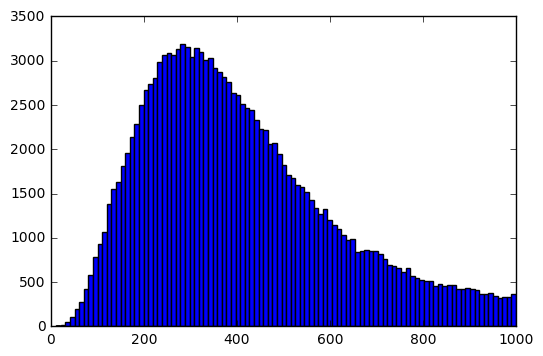

In [157]:
out = plt.hist(medianDistMatched, bins=100)

In [158]:
#plt.hist(np.log10(distUnmatched.ravel()), bins=100, log=True, histtype='step')
#plt.ylim(5, 5e5)
#plt.title('Unmatched Star Distances')
#plt.xlabel('log Distance [pc]')

In [159]:
#print np.shape(dist)
#print np.shape(distMatched)

In [160]:
def absMag(apparentMag, distance):
    return apparentMag - 5.*np.log10(distance/10.)

In [161]:
M_b = absMag(magsMatched['bmag'], medianDistMatched)
M_v = absMag(magsMatched['vmag'], medianDistMatched)
M_g = absMag(magsMatched['gmag'], medianDistMatched)
M_r = absMag(magsMatched['rmag'], medianDistMatched)
M_i = absMag(magsMatched['imag'], medianDistMatched)

In [162]:
#print np.min(M_b), np.max(M_b), np.sum(np.isnan(M_b))

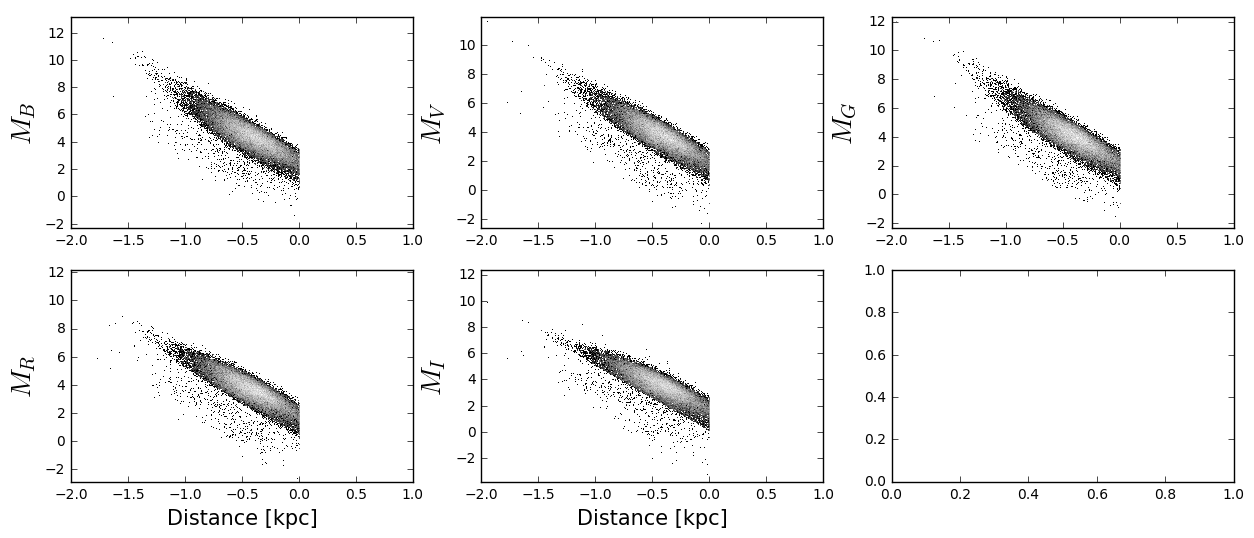

In [163]:
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.ravel()
ylabels = ['$M_B$', '$M_V$', '$M_G$', '$M_R$', '$M_I$']
bands = [M_b, M_v, M_g, M_r, M_i]
for ax, i in zip(axes, np.arange(len(bands))):
    out = ax.hist2d(np.log10(medianDistMatched/1000.), bands[i], bins=500, norm=LogNorm(), cmap=plt.get_cmap('gray'))
    if i in [3, 4]: ax.set_xlabel('Distance [kpc]', fontsize=15)
    ax.set_ylabel(ylabels[i], fontsize=20)
    ax.set_xlim(-2, 1)

In [164]:
tree = kdtree.cKDTree(data=zip(M_b, M_v, M_g, M_r, M_i))

In [165]:
def chisq(data, value, error):
    return np.sqrt(np.sum(((data - value)/error)**2.))/len(data)

In [166]:
print [magsMatched[e][star] for e in errors]

IndexError: index 426441 is out of bounds for axis 0 with size 142611

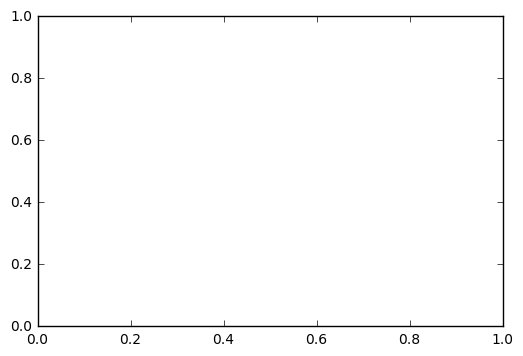

In [170]:
fig, ax = plt.subplots()
for star in np.random.randint(0, len(magsMatched), 100000):
    pts = [M_b[star], M_v[star], M_g[star], M_r[star], M_i[star]]
    errorDistance = np.sum([magsMatched[e][star]**2. for e in errors])
    #treeInd = tree.query_ball_point(pts, errorDistance) #10.*errorDistance)
    treeDist, treeInd = tree.query(pts, k=5, distance_upper_bound=errorDistance/10)

    if treeInd[1] != len(magsMatched): 
        #print star, treeInd
        #print star, treeDist
        print 'Chisq     :',' '.join(["{:.4f}".format(chisq(np.array([M_b[i],   M_v[i],   M_g[i],   M_r[i],   M_i[i]]), 
                           np.array([M_b[star],M_v[star],M_g[star],M_r[star],M_i[star]]),
                           np.array([magsMatched[e][star] for e in errors])))
                    for i in treeInd[1:] if i != len(magsMatched)])
        print 'Sigma Src :',' '.join(["{:.4f}".format(np.float(magsMatched[e][star])) for e in errors])
        print 'Mags Src  : '+ "{:.4f}".format(M_b[star]) + ' ' + \
                              "{:.4f}".format(M_v[star]) + ' ' + \
                              "{:.4f}".format(M_g[star]) + ' ' + \
                              "{:.4f}".format(M_r[star]) + ' ' + \
                              "{:.4f}".format(M_i[star])    
        for i in treeInd[1:]: 
            if i != len(magsMatched): print 'Mags Match: ' + "{:.4f}".format(M_b[i]) + ' ' + \
                                                             "{:.4f}".format(M_v[i]) + ' ' + \
                                                             "{:.4f}".format(M_g[i]) + ' ' + \
                                                             "{:.4f}".format(M_r[i]) + ' ' + \
                                                             "{:.4f}".format(M_i[i])
        print '\n'
        ax.errorbar(wavelength, [M_b[star],M_v[star],M_g[star],M_r[star],M_i[star]],[magsMatched[e][star] for e in errors], color='black', fmt='o')
        for i in treeInd[1:]:
            if i != len(magsMatched): ax.scatter(wavelength, [M_b[i],M_v[i],M_g[i],M_r[i],M_i[i]], s=100, color='green')

In [ ]:
print treeInd

In [ ]:
chisq([M_b[treeInd], M_v[treeInd], M_g[treeInd], M_r[treeInd], M_i[treeInd]], 
      [M_b[star],    M_v[star],    M_g[star],    M_r[star],    M_i[star]],
      [magsMatched[e] for e in errors])

In [ ]:
star = 1
chisq = ((M_b - M_b[star])/magsMatched['e_bmag'])**2. + \
            ((M_v - M_v[star])/magsMatched['e_vmag'])**2. + \
            ((M_g - M_g[star])/magsMatched['e_gmag'])**2. + \
            ((M_r - M_r[star])/magsMatched['e_rmag'])**2. + \
            ((M_i - M_i[star])/magsMatched['e_imag'])**2.       

In [ ]:
chisqArg = np.argsort(chisq)
print chisq[chisqArg]
print medianDistMatched[star]

In [ ]:
for mag, er in zip(mags, errors): print magsMatched[mag][star], magsMatched[er][star], magsMatched[mag][chisqArg[1:5]]

In [ ]:
plt.scatter(np.abs(medianDistMatched[chisq != 0] - medianDistMatched[star]), np.log10(chisq[chisq != 0]), s=3)

In [ ]:
plt.scatter(magsMatched['e_gmag'][chisq != 0], np.log10(chisq[chisq != 0]))

In [ ]:
nstars = 100
pair = np.zeros(nstars, dtype=np.int32)
chi = np.zeros(nstars, dtype=np.float32)
for i, star in enumerate(np.random.randint(0, len(M_b), nstars)):
    chisq = ((M_b - M_b[star])/magsMatched['e_bmag'])**2. + \
            ((M_v - M_v[star])/magsMatched['e_vmag'])**2. + \
            ((M_g - M_g[star])/magsMatched['e_gmag'])**2. + \
            ((M_r - M_r[star])/magsMatched['e_rmag'])**2. + \
            ((M_i - M_i[star])/magsMatched['e_imag'])**2.       
    chisqArg = np.argsort(chisq)
    pair[i] = chisqArg[1]
    chi[i] = chisq[chisqArg[1]]

In [ ]:
print pair
print chi

In [ ]:
R_max = 250. # 250 pc cylinder around the Sun
z_bins = np.linspace(-800, 800, 128) # pc
b = np.radians(tgas['b'])

In [ ]:
R = dist * np.cos(b)[:,None]
z = dist * np.sin(b)[:,None]

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,5))

for i in range(dist.shape[1]):
#     H,edges = np.histogram(z[R[:,i] < R_max,i], bins=z_bins)
    H,edges = np.histogram(z[:,i], bins=z_bins)
    
    bin_centers = (edges[1:]+edges[:-1])/2.
    cyl_volume = np.pi*R_max**2 * (edges[1:]-edges[:-1])
    # plt.errorbar(bin_centers, H / cyl_volume, yerr=np.sqrt(H)/cyl_volume, marker='.')
    
    axes[0].plot(bin_centers, H, ls='-', marker='', alpha=0.1, 
                 color='#555555', drawstyle='steps')
    axes[1].plot(bin_centers, H, ls='-', marker='', alpha=0.1, 
                 color='#555555', drawstyle='steps')

axes[1].set_xlim(-200, 200)
axes[1].set_ylim(1E4, 4E4)
axes[1].axvline(0., color='#3182bd', alpha=0.4)
axes[1].axvline(-20., color='#e34a33', alpha=0.4)
    
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xlabel('z [pc]')
axes[1].set_xlabel('z [pc]')

# axes[0].set_ylabel('n(z) [pc$^{-3}$]')